In [22]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

Import/create images to get power spectra of

In [23]:
input_dir = os.path.join(config.machine.data_dir, 'output', 'power_spectrum_galsim')

no_cut_model = np.load(os.path.join(input_dir, 'no_cut_model.npy'))
cut_7_model = np.load(os.path.join(input_dir, 'cut_7_model.npy'))
cut_8_model = np.load(os.path.join(input_dir, 'cut_8_model.npy'))

dif_no_8 = no_cut_model - cut_8_model
dif_no_7 = no_cut_model - cut_7_model
dif_7_8 = cut_7_model - cut_8_model

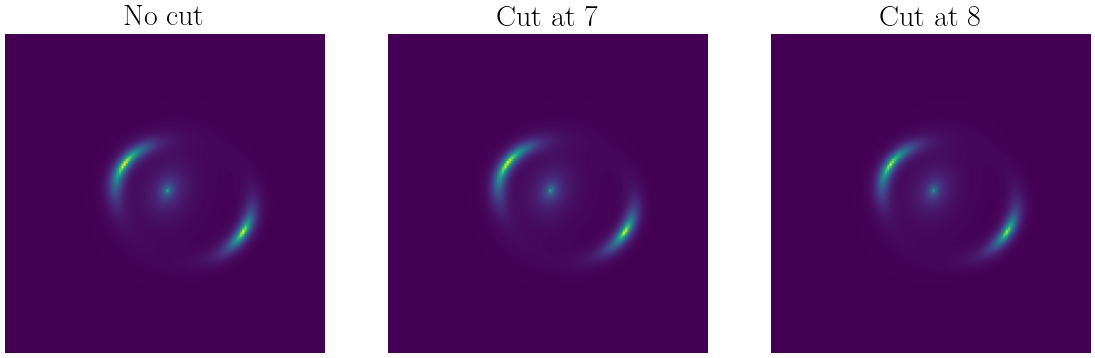

In [24]:
f, ax = plt.subplots(1, 3, figsize=(14, 6))
ax[0].imshow(no_cut_model)
ax[0].set_title('No cut')
ax[1].imshow(cut_7_model)
ax[1].set_title('Cut at 7')
ax[2].imshow(cut_8_model)
ax[2].set_title('Cut at 8')
for i in ax: i.set_axis_off()
plt.show()

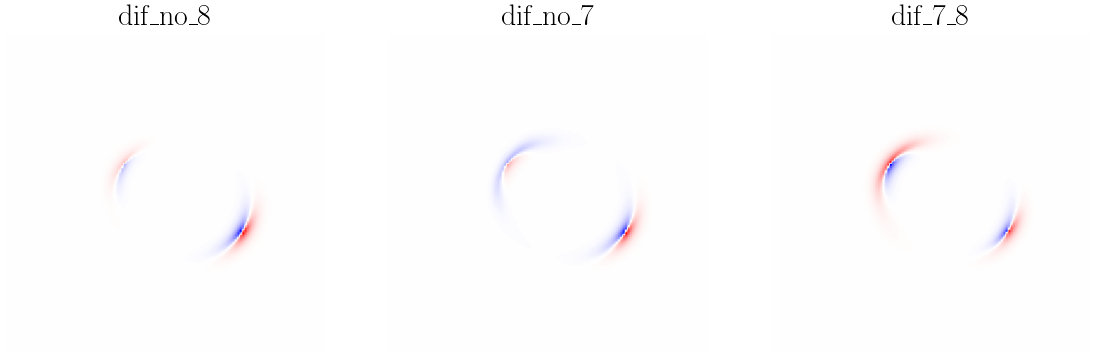

In [25]:
f, ax = plt.subplots(1, 3, figsize=(14, 6))
ax[0].imshow(dif_no_8, cmap='bwr', **plot_util.set_v([dif_no_8]))
ax[0].set_title('dif_no_8')
ax[1].imshow(dif_no_7, cmap='bwr', **plot_util.set_v([dif_no_7]))
ax[1].set_title('dif_no_7')
ax[2].imshow(dif_7_8, cmap='bwr', **plot_util.set_v([dif_7_8]))
ax[2].set_title('dif_7_8')
for i in ax: i.set_axis_off()
plt.show()

Set the x-axis

In [26]:
k_min = (2 * np.pi) / 4.95
k_max = (2 * np.pi) / 0.11

k_array = np.linspace(k_min, k_max, 45, endpoint=True)

Now work on the y-axis

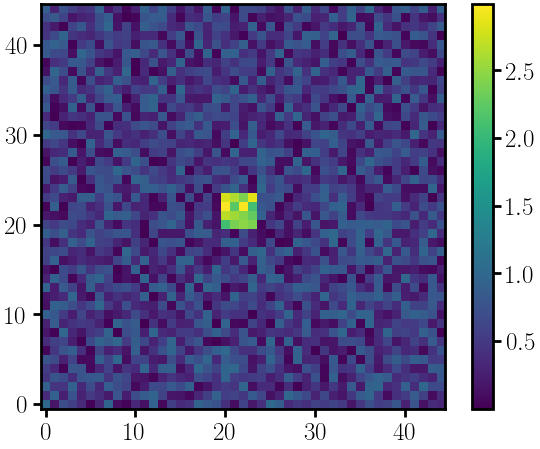

In [27]:
image = np.random.rand(45, 45)

signal_size = 4
signal = np.ones((signal_size, signal_size)) * 2
min, max = 22 - (signal_size // 2), 22 + (signal_size // 2)
# print(min, max)
image[min:max, min:max] += signal

plt.imshow(image, origin='lower')
plt.colorbar()
plt.show()

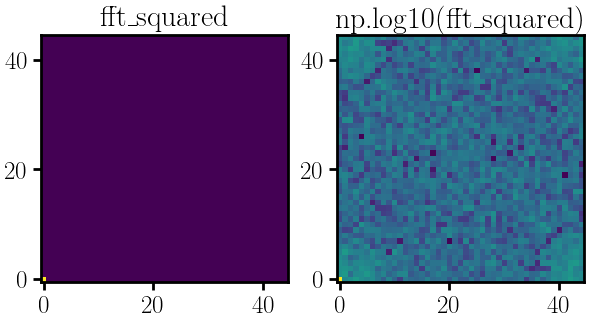

In [28]:
fft = np.fft.fft2(image)
fft_squared = np.square(np.abs(fft))

f, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(fft_squared, origin='lower')
ax[1].imshow(np.log10(fft_squared), origin='lower')

ax[0].set_title('fft_squared')
ax[1].set_title('np.log10(fft_squared)')

plt.show()

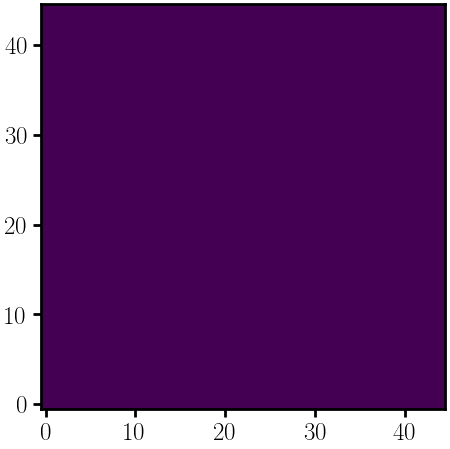

In [29]:
# figure out how to identify thin shells

zeros = np.zeros((45, 45))

plt.imshow(zeros)
plt.show()

In [30]:
radius_list = range(45)

for radius in radius_list:
    for x, row in enumerate(zeros):
        for y, pixel in enumerate(row):
            if radius == round(np.sqrt((x ** 2) + (y ** 2))):
                zeros[x][y] += radius

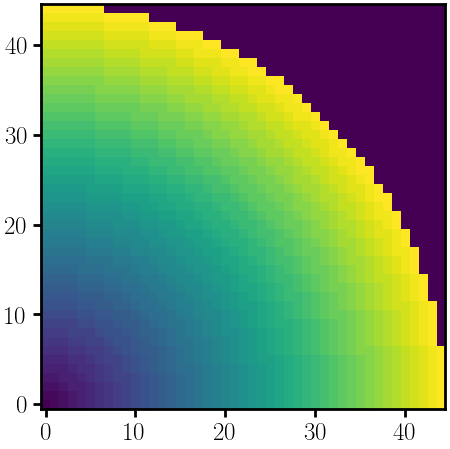

In [31]:
plt.imshow(zeros, origin='lower')
plt.show()

In [34]:
power_list = []
radius_list = range(45)

for radius in radius_list:
    power_per_radius = []
    for x, row in enumerate(fft_squared):
        for y, pixel in enumerate(row):
            if radius == round(np.sqrt((x ** 2) + (y ** 2))):
                power_per_radius.append(fft_squared[x][y])

    power_list.append(np.sum(power_per_radius))

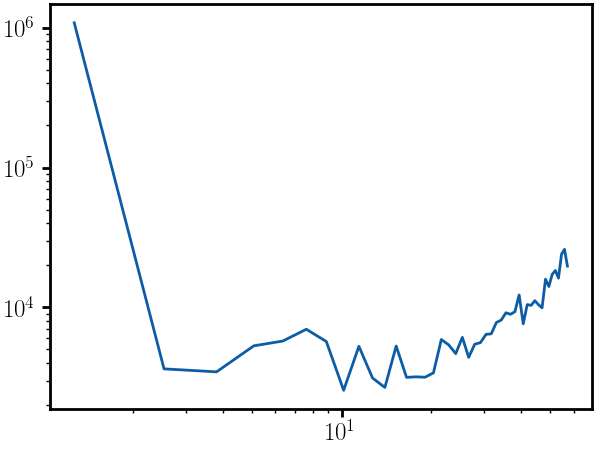

In [36]:
plt.loglog(k_array, power_list)

plt.show()

In [33]:
# power_list = []

# for radius in radius_list:
#     power = np.sum(np.where(radius == np.sqrt((x ** 2) + (y ** 2)), fft_squared))
#     power_list.append(power)